Top 6 Outliers:
                     Country  Tariff Percentage
0                      China                105
1  Saint Pierre and Miquelon                 50
2                    Lesotho                 50
3                   Cambodia                 49
4                 Madagascar                 47
5                  Sri Lanka                 44


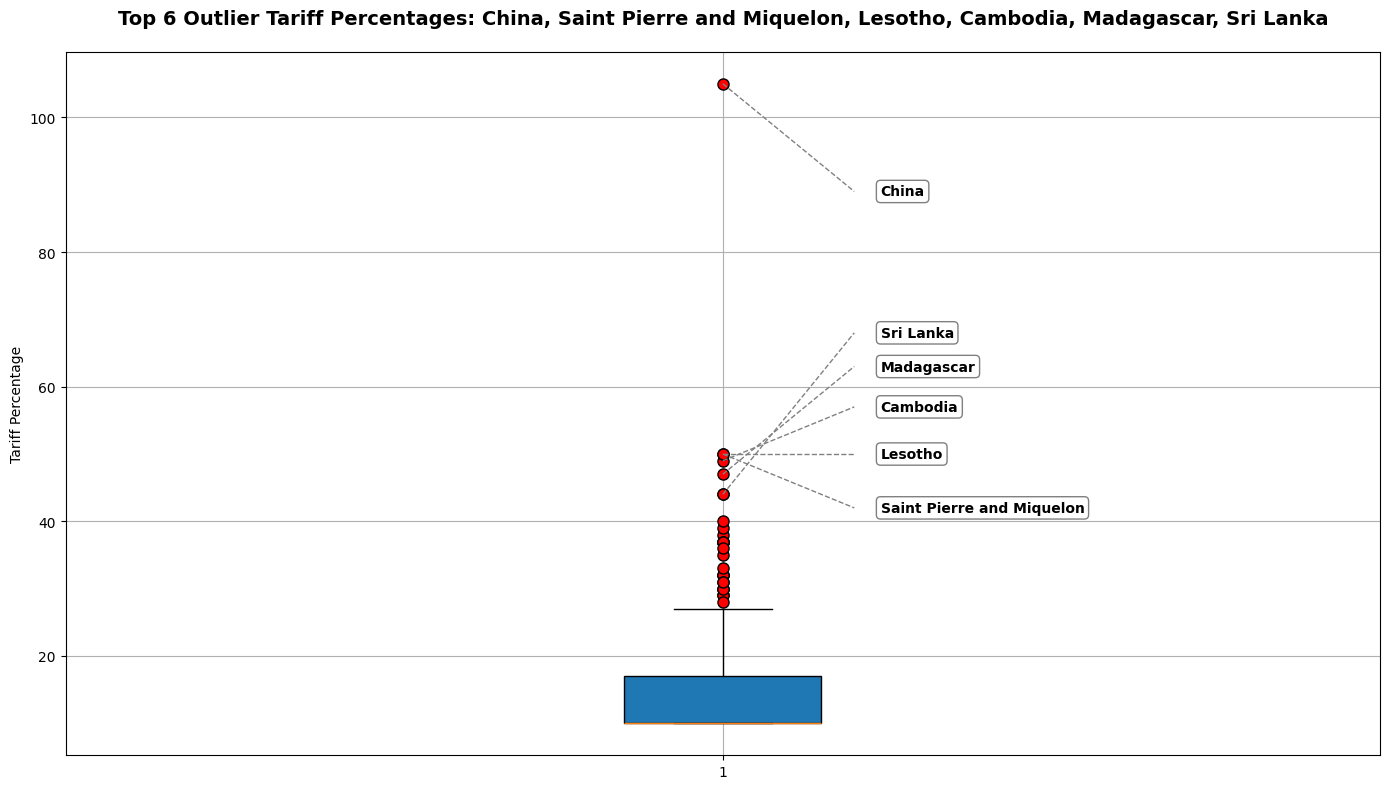

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data (adjust path as needed)
df = pd.read_csv('Data.csv')
exports_df = pd.read_csv("Top_Countries.csv")

# Calculate IQR and detect outliers
q1 = df['Tariff Percentage'].quantile(0.25)
q3 = df['Tariff Percentage'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify and rank top 5 outliers
outliers = df[(df['Tariff Percentage'] < lower_bound) | (df['Tariff Percentage'] > upper_bound)].copy()
outliers['Outlier Distance'] = np.abs(outliers['Tariff Percentage'] - df['Tariff Percentage'].median())
top_outliers = outliers.sort_values(by='Outlier Distance', ascending=False).head(6)
top_outliers_sorted = top_outliers.sort_values(by='Tariff Percentage', ascending=False).reset_index(drop=True)

# Print to confirm
print("Top 6 Outliers:")
print(top_outliers_sorted[['Country', 'Tariff Percentage']])

# Prepare title
top_countries = ", ".join(top_outliers_sorted['Country'].tolist())
custom_title = f"Top 6 Outlier Tariff Percentages: {top_countries}"

# Plot
plt.figure(figsize=(14, 8))
flier_props = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
plt.boxplot(df['Tariff Percentage'], vert=True, patch_artist=True, flierprops=flier_props)
plt.title(custom_title, fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Tariff Percentage')
plt.grid(True)

# Add lines and labels
for i, row in top_outliers_sorted.iterrows():
    y_value = row['Tariff Percentage']
    offset = (i - 2) * 8  # Increase vertical spacing
    label_y = y_value + offset

    plt.plot([1, 1.1], [y_value, label_y], color='gray', linestyle='--', linewidth=1)
    plt.text(
        1.12,
        label_y,
        row['Country'],
        verticalalignment='center',
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
    )

# Prevent label clipping
plt.tight_layout()
plt.show()

In [2]:
q1 = df['Tariff Percentage'].quantile(0.25)
q3 = df['Tariff Percentage'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(df['Tariff Percentage'] < lower_bound) | (df['Tariff Percentage'] > upper_bound)]

# Count and display number of outliers
total_outliers = outliers.shape[0]
print(f"Total number of outliers: {total_outliers}")


Total number of outliers: 29


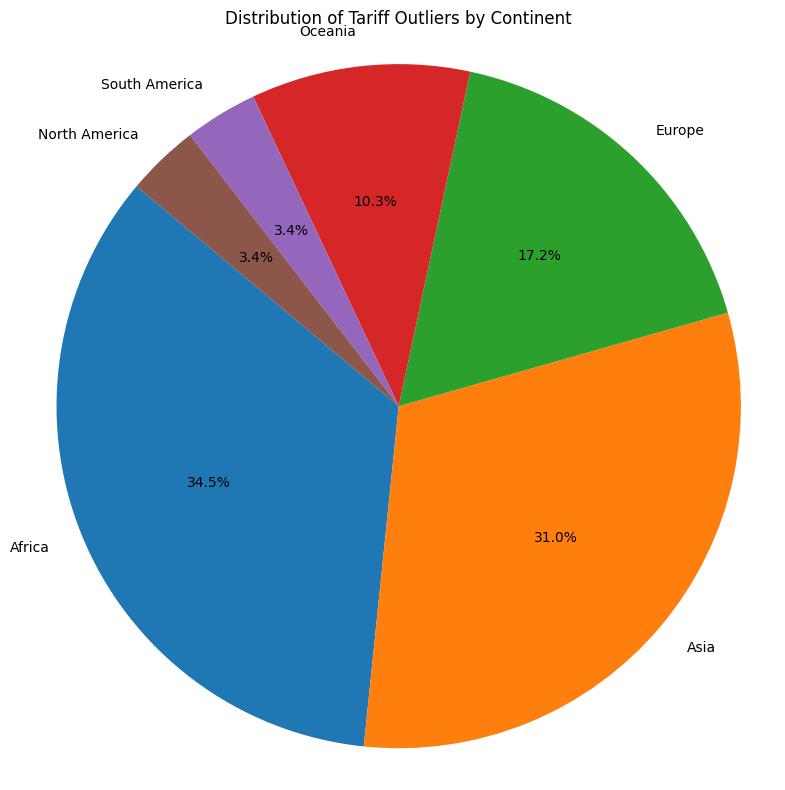

In [10]:
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tariff Outliers by Continent')
plt.axis('equal')  # Keep the pie chart circular
plt.tight_layout()
plt.show()

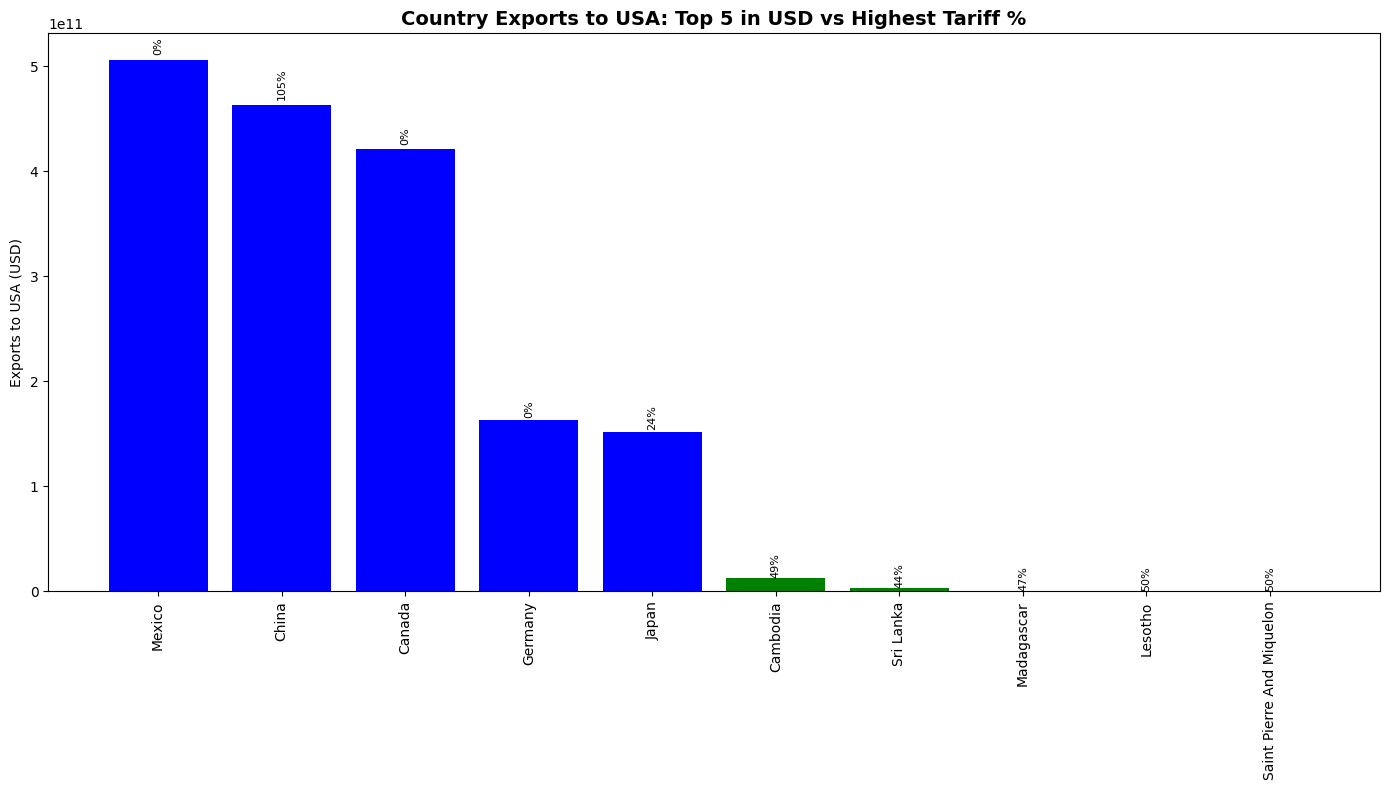

In [3]:
# Clean exports data
exports_df['Country'] = exports_df['Country'].str.strip().str.lower()
exports_df['Exports to US'] = exports_df['Exports to US'].replace('[\$,]', '', regex=True).astype(float)

# Clean tariffs data
df['Country'] = df['Country'].str.strip().str.lower()

# Fix known mismatches in export country names
name_corrections = {
    'saint pierre and mequelon': 'saint pierre and miquelon'
}
exports_df['Country'] = exports_df['Country'].replace(name_corrections)

# Merge export and tariff data
merged_df = exports_df.merge(df[['Country', 'Tariff Percentage']], on='Country', how='left')

# Fill missing tariff values with 0
merged_df['Tariff Percentage'] = merged_df['Tariff Percentage'].fillna(0)

# Drop rows with missing country names
merged_df = merged_df.dropna(subset=['Country'])

# Sort by export value
merged_df = merged_df.sort_values(by='Exports to US', ascending=False).reset_index(drop=True)

# Capitalize country names for display
merged_df['Country'] = merged_df['Country'].str.title()

# Create color list for top 5 in blue, rest in green
colors = ['blue' if i < 5 else 'green' for i in range(len(merged_df))]

# Plot bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(merged_df['Country'], merged_df['Exports to US'], color=colors)

# Add tariff percentage labels above each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    tariff = merged_df.iloc[i]['Tariff Percentage']
    plt.text(bar.get_x() + bar.get_width()/2, height + height * 0.01, f'{tariff:.0f}%', 
             ha='center', va='bottom', fontsize=8, rotation=90)

# Title and labels
plt.title('Country Exports to USA: Top 5 in USD vs Highest Tariff %', fontsize=14, fontweight='bold')
plt.ylabel('Exports to USA (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
import pycountry_convert as pc

# Convert country to continent
def get_continent(country):
    try:
        code = pc.country_name_to_country_alpha2(country)
        continent = pc.country_alpha2_to_continent_code(code)
        return pc.convert_continent_code_to_continent_name(continent)
    except:
        return "Unknown"

# Apply to outliers
outliers.loc[:, 'Continent'] = outliers['Country'].apply(get_continent)
# Count number of outliers by continent
continent_counts = outliers['Continent'].value_counts()
# Count and display
print(outliers['Continent'].value_counts())

Continent
Africa           10
Asia              9
Europe            5
Oceania           3
South America     1
North America     1
Name: count, dtype: int64


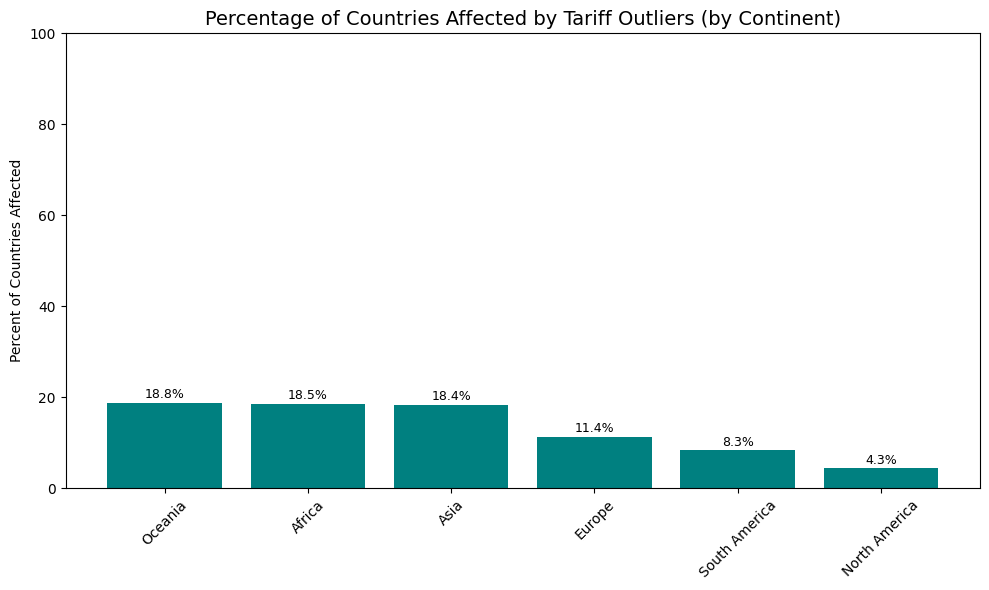

In [9]:
# Approximate number of recognized countries per continent
total_countries_by_continent = {
    'Africa': 54,
    'Asia': 49,
    'Europe': 44,
    'North America': 23,
    'South America': 12,
    'Oceania': 16
}

# Count of outlier countries per continent
outlier_counts = outliers['Continent'].value_counts().to_dict()

# Calculate percentage of countries affected by tariffs
percentage_affected = {
    continent: (outlier_counts.get(continent, 0) / total) * 100
    for continent, total in total_countries_by_continent.items()
}

# Create DataFrame for plotting
df_percent = pd.DataFrame.from_dict(percentage_affected, orient='index', columns=['% of Countries Affected'])
df_percent = df_percent.sort_values('% of Countries Affected', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_percent.index, df_percent['% of Countries Affected'], color='teal')

# Add percentage labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', fontsize=9)

plt.title('Percentage of Countries Affected by Tariff Outliers (by Continent)', fontsize=14)
plt.ylabel('Percent of Countries Affected')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()